Comparing the different choices for the polynomials that are used for the recursion constructing the Trefftz basis. In 1+1 dimensions on a mesh with anisotropic elements.

In [1]:
N = 4
c=1
t_steps = c*N
order = 10
k = 1

In [2]:
import sys
sys.path.append("..")
from ngsolve import *
SetHeapSize(100*1000*1000)

from trefftzngs import *
from DGeq import *
from prodmesh import *
from math import pi

truesol =  sin( k*(c*y + x) )#exp(-pow(c*x+y,2)))#
v0 = c*k*cos(k*(c*y+x))#grad(U0)[0]
sig0 = -k*cos(k*(c*y+x))#-grad(U0)[1]
# U0 = GridFunction(fes)
# U0.Set(truesol)
# Draw(U0,mesh,'U0')
c=1
truesol = cos(pi*x)*sin(pi*y)/pi
v0 = cos(pi*x)*cos(pi*y)
sig0 = sin(pi*x)*sin(pi*y)

In [3]:
def error(gfu,truesol,fes):
    L2error = sqrt(Integrate((truesol - gfu)*(truesol - gfu), mesh))

    gradtruesol = CoefficientFunction((-sig0,v0))
    sH1error = sqrt(Integrate((gradtruesol - grad(gfu))*(gradtruesol - grad(gfu)), mesh))

    return [L2error,sH1error]

In [4]:
mesh = CartSquare(N,t_steps)
solution = []
for order in range(3,13):
    for btype in range(0,3):
        print("run order nr.: " + str(order))
        fes = FESpace("trefftzfespace", mesh, order = order, wavespeed = c, dgjumps=True, basistype = btype)
        [a,f] = DGeqsys(fes,truesol,v0,sig0,c,v0)
        [gfu, cond] = DGsolve(fes,a,f)
        [L2error,sH1error] = error(gfu,truesol,fes)
        solution.append([btype,order,cond,L2error,sH1error])
        print("btype: " + str(btype) + " cond: " + str(cond) + " L2error: " + str(L2error) + " H1error: "+ str(sH1error))

run order nr.: 3
btype: 0 cond: 5507.611832646065 L2error: 0.0003335895047952071 H1error: 0.006306881429589299
run order nr.: 3
btype: 1 cond: 62060.131551807586 L2error: 0.0003335895047935159 H1error: 0.006306881429577885
run order nr.: 3
btype: 2 cond: 318609.634570242 L2error: 0.00033358950479642625 H1error: 0.0063068814295961315
run order nr.: 4
btype: 0 cond: 12442.803615305083 L2error: 2.681204610203117e-05 H1error: 0.0006416284496930887
run order nr.: 4
btype: 1 cond: 573425.8655176172 L2error: 2.6812046038751797e-05 H1error: 0.0006416284497765302
run order nr.: 4
btype: 2 cond: 2743871.4706439455 L2error: 2.681204605137169e-05 H1error: 0.0006416284496899839
run order nr.: 5
btype: 0 cond: 30054.94840638514 L2error: 2.0527454855952045e-06 H1error: 6.834444259168014e-05
run order nr.: 5
btype: 1 cond: 86268551.16657168 L2error: 2.05274398228698e-06 H1error: 6.834444695920135e-05
run order nr.: 5
btype: 2 cond: 358340678.84498495 L2error: 2.0527465997435336e-06 H1error: 6.83444336

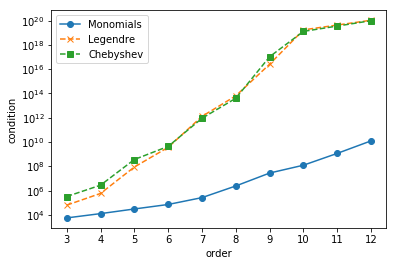

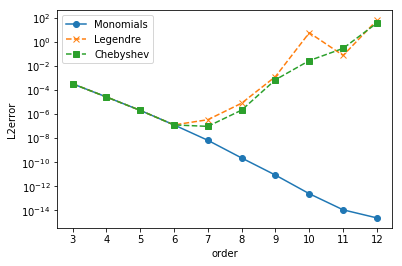

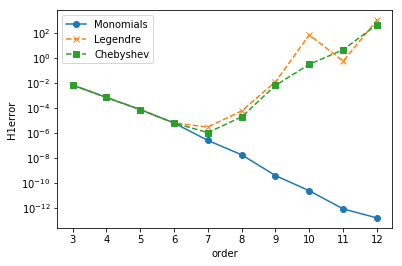

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

data = ['condition', 'L2error', 'H1error']
sol = np.array(solution)

for i in range(len(data)):
    fig = plt.figure()
    ax = fig.gca()
    plt.semilogy(sol[sol[:,0]==0,1], sol[sol[:,0]==0,i+2], '-o', label="Monomials")
    plt.semilogy(sol[sol[:,0]==1,1], sol[sol[:,0]==1,i+2], '--x', label="Legendre")
    plt.semilogy(sol[sol[:,0]==2,1], sol[sol[:,0]==2,i+2], '--s', label="Chebyshev")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    #plt.title('Wavespeed: ' + str(c) + " Meshsize: " + str(1/N))
    plt.legend()
    plt.ylabel(data[i])
    plt.xlabel('order')
    plt.savefig("../results/diffbasis_"+data[i]+".eps")
    plt.draw()